<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2

from scipy.stats import norm

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


- Marginal and Conditional Probability https://hadrienj.github.io/posts/Marginal-and-Conditional-Probability/
- Joint Probability, Bayes Rule, probability chain rule.

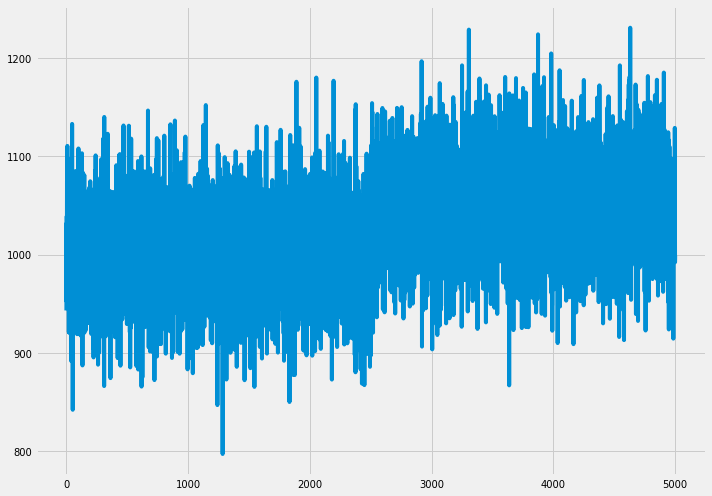

In [15]:
# define size of two regions (changepoint occurring at the middle)
size1 = 2500
size2 = 2500

scale = 50 #standard deviation of distribution function
loc1 = 1000 #mean of normal for first part
loc2 = 1050 #mean of normal for second part
d1 = norm.rvs(loc = loc1, size = size1, scale = scale)
d2 = norm.rvs(loc = loc2, size = size2, scale = scale)
data = np.r_[d1, d2]
    
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10, 7
plt.rcParams['font.size'] = 10

plt.plot(range(1, data.shape[0] + 1), data)
plt.tight_layout()

In [18]:
import numpy
import numpy.random
import numpy.linalg
from functools import partial
from bocd import * 

LAMBDA = 100
ALPHA = 0.1
BETA = 1.
KAPPA = 1.
MU = 0.
DELAY = 15
THRESHOLD = 0.5

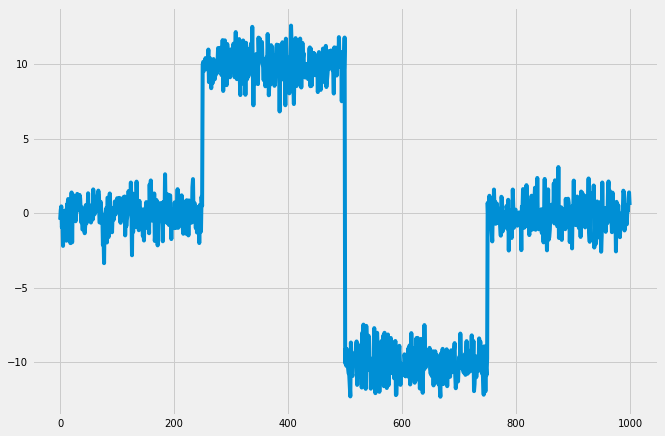

In [19]:
series = numpy.random.normal(size=1000)
series[len(series) // 4:len(series) // 2] += 10.
series[len(series) // 2:3 * len(series) // 4] -= 10.

plt.plot(series)
plt.show()

In [11]:
from bocd import BOCD, StudentT, constant_hazard

bocd = BOCD(partial(constant_hazard, LAMBDA),
                StudentT(ALPHA, BETA, KAPPA, MU))
changepoints = []
for x in series[:DELAY]:
    bocd.update(x)
for x in series[DELAY:]:
    bocd.update(x)
    if bocd.growth_probs[DELAY] >= THRESHOLD:
        changepoints.append(bocd.t - DELAY + 1)

assert numpy.linalg.norm(numpy.array(changepoints) - 
                         numpy.array([250, 500, 750]),
                         ord=1) < 3

In [13]:
bocd = BOCD(partial(constant_hazard, LAMBDA),
                StudentT(ALPHA, BETA, KAPPA, MU))
changepoints = []
for x in series[:DELAY]:
    bocd.update(x)
for x in series[DELAY:]:
    bocd.update(x)
    if bocd.growth_probs[DELAY] >= THRESHOLD:
        changepoints.append(bocd.t - DELAY + 1)
        bocd.prune(bocd.t - DELAY)

assert numpy.linalg.norm(numpy.array(changepoints) - 
                         numpy.array([250, 500, 750]),
                         ord=1) < 3

In [4]:
import online_changepoint_detection as oncd
from functools import partial

R, maxes = oncd.online_changepoint_detection(data, partial(oncd.constant_hazard, 250), oncd.StudentT(0.1, .01, 1, 0))

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


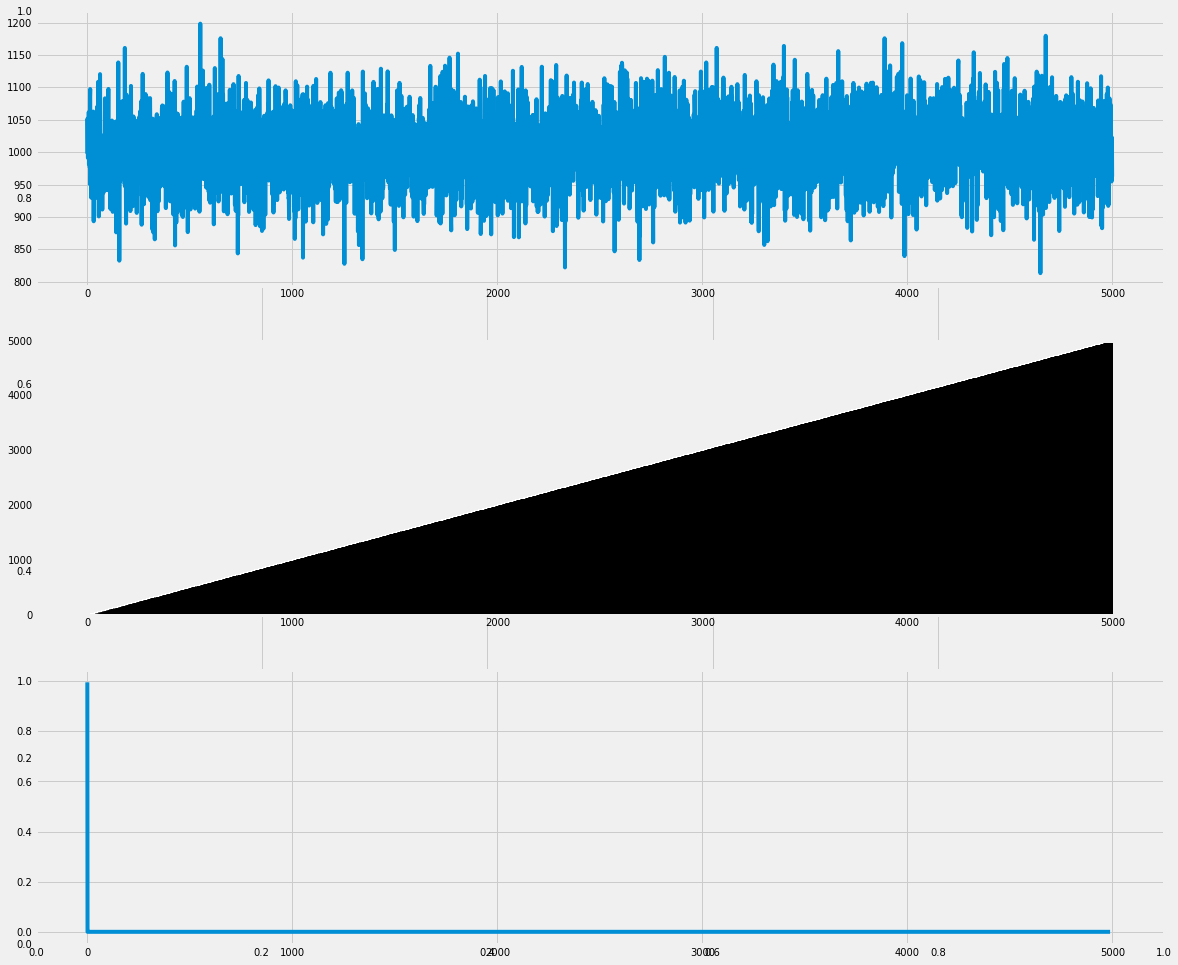

In [5]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=[18, 16])
ax = fig.add_subplot(3, 1, 1)
ax.plot(data)
ax = fig.add_subplot(3, 1, 2, sharex=ax)
sparsity = 5  # only plot every fifth data for faster display
ax.pcolor(np.array(range(0, len(R[:,0]), sparsity)), 
          np.array(range(0, len(R[:,0]), sparsity)), 
          -np.log(R[0:-1:sparsity, 0:-1:sparsity]), 
          cmap=cm.Greys, vmin=0, vmax=30)
ax = fig.add_subplot(3, 1, 3, sharex=ax)
Nw=10;
ax.plot(R[Nw,Nw:-1])

- https://github.com/amanahuja/change-detection-tutorial
- https://arxiv.org/pdf/0710.3742v1.pdf
- https://turi.com/learn/userguide/anomaly_detection/bayesian_changepoints.html

https://towardsdatascience.com/why-machine-learning-models-degrade-in-production-d0f2108e9214